In [1]:
import pandas as pd
import datetime

# 기본데이터정제

In [2]:
df = pd.read_excel("maindata/01_제공데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_시청률 데이터.xlsx", index_col =[0])
data = df.T
data_org = data.copy()

In [5]:
# 기본데이터 정제
data_org = data_org.iloc[:,-1:].reset_index()
data = data.iloc[:-1, :-1]
data = data.reset_index()

In [11]:
# d3
d1 = pd.melt(data, id_vars=['index'], var_name='time', value_name='rate').copy()
d1 = d1.rename(columns = {"index":"date"})
d1["hour"] = [i[0:2] for i in d1["time"]]
d2 = d1.groupby(["date", 'hour'])["rate"].max().reset_index()
d3 = d2.groupby('date').mean().copy().reset_index()
d3["data_org"] = data_org.iloc[:,-1:]

In [10]:
#d3_1
d2_1 = d1.groupby(["date", 'hour'])["rate"].mean().reset_index()
d3_1 = d2_1.groupby('date').mean().copy().reset_index()
d3_1["data_org"] = data_org.iloc[:,-1:]

<AxesSubplot:>

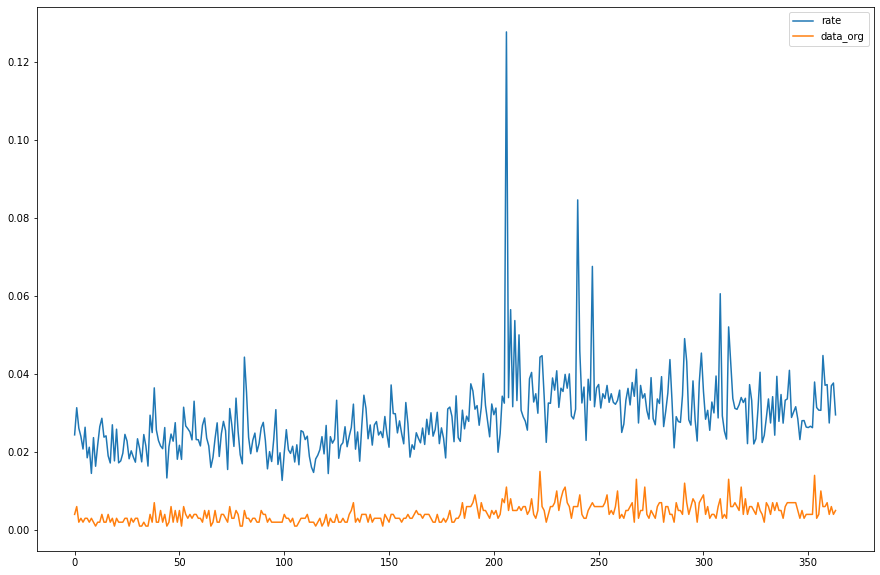

In [12]:
import matplotlib.pyplot as plt
#plt.figure()
d3.plot(figsize=(15,10))

<AxesSubplot:>

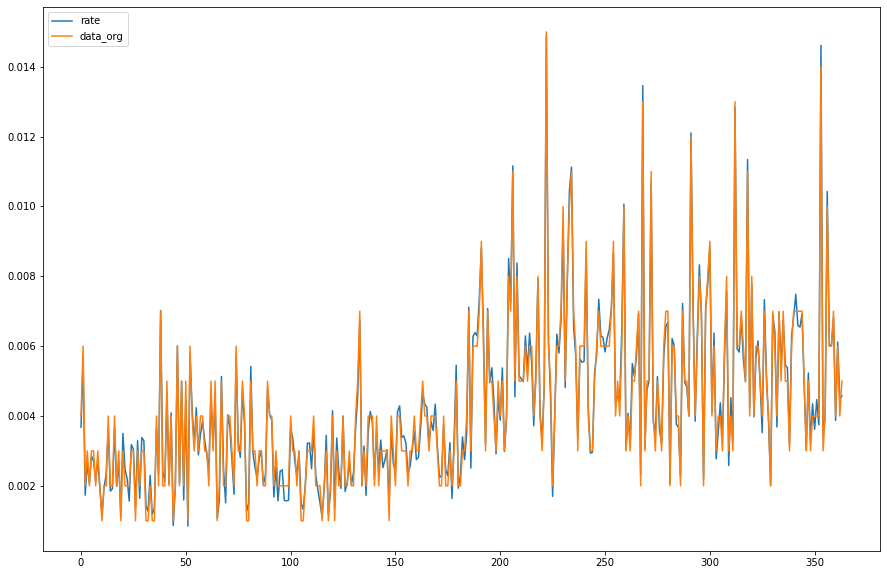

In [13]:
d3_1.plot(figsize=(15,10))

In [15]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    8736 non-null   object 
 1   hour    8736 non-null   object 
 2   rate    8736 non-null   float64
dtypes: float64(1), object(2)
memory usage: 204.9+ KB


In [18]:
d2_org = d2.copy()
d2["date"] = pd.to_datetime(d2["date"], format = "%Y-%m-%d", errors='raise')
d2

,date,hour,rate
0,2019-01-01,00,0.012
1,2019-01-01,01,0.034
2,2019-01-01,02,0.014
3,2019-01-01,03,0.014
4,2019-01-01,04,0.014
...,...,...,...
8731,2019-12-30,19,0.036
8732,2019-12-30,20,0.028
8733,2019-12-30,21,0.050
8734,2019-12-30,22,0.016


In [22]:
d2["weekday"] = d2["date"].dt.weekday

,date,hour,rate,weekday
0,2019-01-01,00,0.012,1
1,2019-01-01,01,0.034,1
2,2019-01-01,02,0.014,1
3,2019-01-01,03,0.014,1
4,2019-01-01,04,0.014,1
...,...,...,...,...
8731,2019-12-30,19,0.036,0
8732,2019-12-30,20,0.028,0
8733,2019-12-30,21,0.050,0
8734,2019-12-30,22,0.016,0


In [24]:
weekday = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
d2["weekday"] = d2["weekday"].apply(lambda x: weekday[x])

In [25]:
d2

,date,hour,rate,weekday
0,2019-01-01,00,0.012,화
1,2019-01-01,01,0.034,화
2,2019-01-01,02,0.014,화
3,2019-01-01,03,0.014,화
4,2019-01-01,04,0.014,화
...,...,...,...,...
8731,2019-12-30,19,0.036,월
8732,2019-12-30,20,0.028,월
8733,2019-12-30,21,0.050,월
8734,2019-12-30,22,0.016,월


In [30]:
weather = pd.read_csv('data/2019_weather.csv', encoding = "cp949")
weather

,지점,지점명,일시,최저기온(°C),최고기온(°C),일강수량(mm),일 최심신적설(cm)
0,108,서울,2019-01-01,-8.2,-0.6,NaN,NaN
1,108,서울,2019-01-02,-8.8,0.2,NaN,NaN
2,108,서울,2019-01-03,-8.4,3.2,NaN,NaN
3,108,서울,2019-01-04,-6.2,4.1,NaN,NaN
4,108,서울,2019-01-05,-5.5,1.1,NaN,NaN
...,...,...,...,...,...,...,...
360,108,서울,2019-12-27,-4.6,2.6,NaN,NaN
361,108,서울,2019-12-28,-3.6,6.1,NaN,NaN
362,108,서울,2019-12-29,1.1,6.2,1.4,NaN
363,108,서울,2019-12-30,-5.7,6.8,0.4,NaN


In [33]:
rain = []
for i in weather['일강수량(mm)']:
    if i > 0:
        rain.append(1)
    else:
        rain.append(0)
        
snow = []
for i in weather['일 최심신적설(cm)']:
    if i > 0:
        snow.append(1)
    else:
        snow.append(0)

In [35]:
weather["rain"] = rain
weather['snow'] = snow

In [36]:
weather

,지점,지점명,일시,최저기온(°C),최고기온(°C),일강수량(mm),일 최심신적설(cm),rain,snow
0,108,서울,2019-01-01,-8.2,-0.6,NaN,NaN,0,0
1,108,서울,2019-01-02,-8.8,0.2,NaN,NaN,0,0
2,108,서울,2019-01-03,-8.4,3.2,NaN,NaN,0,0
3,108,서울,2019-01-04,-6.2,4.1,NaN,NaN,0,0
4,108,서울,2019-01-05,-5.5,1.1,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...
360,108,서울,2019-12-27,-4.6,2.6,NaN,NaN,0,0
361,108,서울,2019-12-28,-3.6,6.1,NaN,NaN,0,0
362,108,서울,2019-12-29,1.1,6.2,1.4,NaN,1,0
363,108,서울,2019-12-30,-5.7,6.8,0.4,NaN,1,0


In [56]:
# w = w.rename(columns = {'일시':'date'})
w["date"] = pd.to_datetime(w['date'], format = "%Y-%m-%d")
w

,date,min_c,max_c,rain,snow
0,2019-01-01,-8.2,-0.6,0,0
1,2019-01-02,-8.8,0.2,0,0
2,2019-01-03,-8.4,3.2,0,0
3,2019-01-04,-6.2,4.1,0,0
4,2019-01-05,-5.5,1.1,0,0
...,...,...,...,...,...
360,2019-12-27,-4.6,2.6,0,0
361,2019-12-28,-3.6,6.1,0,0
362,2019-12-29,1.1,6.2,1,0
363,2019-12-30,-5.7,6.8,1,0


In [59]:
data1 = pd.merge(d2, w,how = "left", left_on = 'date', right_on = "date")
data1

,date,hour,rate,weekday,min_c,max_c,rain,snow
0,2019-01-01,00,0.012,화,-8.2,-0.6,0,0
1,2019-01-01,01,0.034,화,-8.2,-0.6,0,0
2,2019-01-01,02,0.014,화,-8.2,-0.6,0,0
3,2019-01-01,03,0.014,화,-8.2,-0.6,0,0
4,2019-01-01,04,0.014,화,-8.2,-0.6,0,0
...,...,...,...,...,...,...,...,...
8731,2019-12-30,19,0.036,월,-5.7,6.8,1,0
8732,2019-12-30,20,0.028,월,-5.7,6.8,1,0
8733,2019-12-30,21,0.050,월,-5.7,6.8,1,0
8734,2019-12-30,22,0.016,월,-5.7,6.8,1,0


In [60]:
data1

,date,hour,rate,weekday,min_c,max_c,rain,snow
0,2019-01-01,00,0.012,화,-8.2,-0.6,0,0
1,2019-01-01,01,0.034,화,-8.2,-0.6,0,0
2,2019-01-01,02,0.014,화,-8.2,-0.6,0,0
3,2019-01-01,03,0.014,화,-8.2,-0.6,0,0
4,2019-01-01,04,0.014,화,-8.2,-0.6,0,0
...,...,...,...,...,...,...,...,...
8731,2019-12-30,19,0.036,월,-5.7,6.8,1,0
8732,2019-12-30,20,0.028,월,-5.7,6.8,1,0
8733,2019-12-30,21,0.050,월,-5.7,6.8,1,0
8734,2019-12-30,22,0.016,월,-5.7,6.8,1,0
